# Programming Assignment 2: Linear Regression

## Instructions

- The aim of this assignment is to give you a hands-on with a real-life machine learning application.
- Use separate training, and testing data as discussed in class.
- You can only use Python programming language and Jupyter Notebooks.
- There are three parts of this assignment. In parts 1 & 2, you can only use **numpy, scipy, pandas, matplotlib and are not allowed to use NLTK, scikit-learn or any other machine learning toolkit**. However, you have to use **scikit-learn** in part 3.
- Carefully read the submission instructions, plagiarism and late days policy below.
- Deadline to submit this assignment is: **Friday, 30th October 2020**.

## Submission Instructions

Submit your code both as notebook file (.ipynb) and python script (.py) on LMS. The name of both files should be your roll number. If you don’t know how to save .ipynb as .py [see this](https://i.stack.imgur.com/L1rQH.png). **Failing to submit any one of them will result in the reduction of marks**.

## Plagiarism Policy

The code MUST be done independently. Any plagiarism or cheating of work from others or the internet will be immediately referred to the DC. If you are confused about what constitutes plagiarism, it is YOUR responsibility to consult with the instructor or the TA in a timely manner. No “after the fact” negotiations will be possible. The only way to guarantee that you do not lose marks is “DO NOT LOOK AT ANYONE ELSE'S CODE NOR DISCUSS IT WITH THEM”.

## Late Days Policy

The deadline of the assignment is final. However, in order to accommodate all the 11th hour issues there is a late submission policy i.e. you can submit your assignment within 3 days after the deadline with 25% deduction each day.


## Introduction

In this exercise, you will implement linear regression and get to see it work on data. After completing this assignment, you will know:
- How to implement linear regression from scratch.
- How to estimate linear regression parameters using gradient descent.
- How to make predictions on new data using learned parameters.

Let's start with the necessary imports.

In [2]:
import os
import numpy as np
import pandas as pd
np.seterr(all='ignore')
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Linear Regression with one variable

Linear regression assumes a linear relationship between the input variables (X) and the single output variable (Y). More specifically, that output (Y) can be calculated from a linear combination of the input variables (X). When there is a single input variable, the method is referred to as a simple linear regression.

Now you will implement simple linear regression to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

### 1.1 Load the dataset

The file `Data/ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss. 

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables `X` and `Y`.

In [196]:
data = np.loadtxt(os.path.join('Data', 'ex1data.txt'), delimiter=',')
X, Y = data[:, 0], data[:, 1]

### 1.2 Plot the dataset
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Execute the next cell to visualize the data.

Text(0.5, 0, 'Population of City in 10,000s')

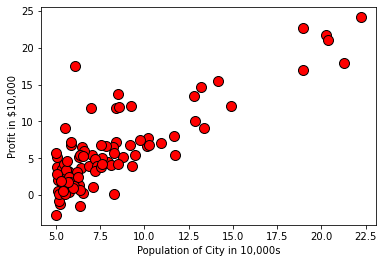

In [197]:
pyplot.plot(X, Y, 'ro', ms=10, mec='k')
pyplot.ylabel('Profit in $10,000')
pyplot.xlabel('Population of City in 10,000s')

### 1.3 Learn the parameters
In this part, you will fit the linear regression parameters $\theta$ to the food truck dataset using gradient descent.

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 ------ (i)$$ 

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta_0 + \theta_1 x ------ (ii)$$

The parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right) ------ (iii)$$

$$ \theta_1 = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x^{(i)} ------ (iv)$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

Let's start by implementing the hypothesis $h_\theta(x)$.

In [198]:
### GRADED FUNCTION ###
def predict(x, theta0, theta1):
    '''
    Calculates the hypothesis for any input sample `x` given the parameters `theta`.
    
    Arguments
    ---------
    x : float
        The input sample.
    
    theta0 : float
        The parameter for the regression function.
        
    theta1 : float
        The parameter for the regression function.
    
    Returns
    -------
    h_x : float
        The hypothesis for input sample.
    
    Hint(s)
    -------
    Compute equation (ii).
    '''
    # You need to return the following variable(s) correctly
    h_x = 0.0
    
    ### START CODE HERE ### (≈ 1 line of code)
    
    h_x = theta0 + (theta1*x)
    
    ### END CODE HERE ###
    
    return h_x

Execute the next cell to verify your implementation.

In [199]:
h_x = predict(x=2, theta0=1.0, theta1=1.0)
print('With x = 2, theta0 = 1.0, theta1 = 1.0\nPredicted Hypothesis h(x) = %.2f' % h_x)
print("Expected hypothesis h(x) = 3.00\n")

With x = 2, theta0 = 1.0, theta1 = 1.0
Predicted Hypothesis h(x) = 3.00
Expected hypothesis h(x) = 3.00



As you perform gradient descent to learn minimize the cost function  $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate  $J(\theta)$ so you can check the convergence of your gradient descent implementation.

In [200]:
### GRADED FUNCTION ###
def computeCost(X, Y, theta0, theta1):
    '''
    Computes cost for linear regression. Computes the cost of using `theta` as the
    parameter for linear regression to fit the data points in `X` and `Y`.
    
    Arguments
    ---------
    X : array
        The input dataset of shape (m, ), where m is the number of training examples.
    
    Y : array
        The values of the function at each data point. This is a vector of
        shape (m, ), where m is the number of training examples.
    
    theta0 : float
        The parameter for the regression function.
        
    theta1 : float
        The parameter for the regression function.
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Hint(s)
    -------
    Compute equation (i).
    '''
    # initialize some useful values
    m = Y.size  # number of training examples
    
    # You need to return the following variable(s) correctly
    J = 0
        
    ### START CODE HERE ### (≈ 3-4 lines of code)
    
    summation = np.sum((np.array(predict(x=X, theta0=theta0, theta1=theta1)) - np.array(Y))**2, axis=0)
    J = (1/(2*m)) * summation
     
    ### END CODE HERE ###
    
    return J

Execute the next cell to verify your implementation.

In [201]:
J = computeCost(X, Y, theta0=1.0, theta1=1.0)
print('With theta0 = 1.0, theta1 = 1.0\nPredicted cost J = %.2f' % J)
print("Expected cost J = 10.27\n")

With theta0 = 1.0, theta1 = 1.0
Predicted cost J = 10.27
Expected cost J = 10.27



Next, you will complete a function which implements gradient descent. The loop structure has been written for you, and you only need to supply the updates to parameters $\theta_j$  within each iteration (epoch). 

The starter code for the function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a `python` list. Assuming you have implemented `gradientDescent` and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [202]:
### GRADED FUNCTION ###
def gradientDescent(X, Y, alpha, n_epoch):
    """
    Performs gradient descent to learn `theta`. Updates `theta` by taking `n_epoch`
    gradient steps with learning rate `alpha`.
    
    Arguments
    ---------
    X : array
        The input dataset of shape (m, ), where m is the number of training examples.
    
    Y : array
        The values of the function at each data point. This is a vector of
        shape (m, ), where m is the number of training examples.
    
    alpha : float
        The learning rate.
    
    n_epoch : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta0 : float
        The parameter for the regression function.
        
    theta1 : float
        The parameter for the regression function.
    
    J : list
        A python list for the values of the cost function after each iteration.
    
    Hint(s)
    -------
    Compute equation (iii) and (iv).

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) here.
    """
    # initialize some useful values
    m = Y.size  # number of training examples
    J = list()  # list to store cost
    
    # You need to return the following variables correctly
    theta0 = 0.0
    theta1 = 0.0
    
    for epoch in range(n_epoch):
        ### START CODE HERE ### (≈ 5-10 lines of code)
        grad0 = 1.0/m * sum([(predict(X[i], theta0, theta1) - Y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(predict(X[i], theta0, theta1) - Y[i]) * X[i] for i in range(m)])
        temp0 = theta0 - alpha * grad0
        temp1 = theta1 - alpha * grad1
        theta0 = temp0
        theta1 = temp1    
        ### END CODE HERE ###

        J.append(computeCost(X, Y, theta0, theta1))
        
    
    return theta0, theta1, J

Execute the next cell to verify your implementation.

In [203]:
n_epoch = 1500
alpha = 0.01

theta0, theta1, J = gradientDescent(X ,Y, alpha, n_epoch)
print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))
print('Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834')

Predicted theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834
Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834


### 1.4 Plot the linear fit

Use your learned parameters $\theta_j$ to plot the linear fit.

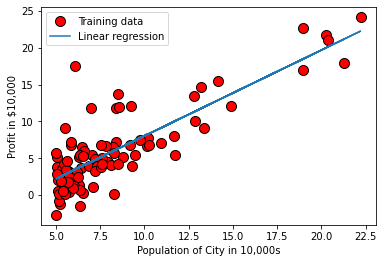

In [204]:
h_x = list()
for x in X:
    h_x.append(predict(x, theta0, theta1))
pyplot.plot(X, Y, 'ro', ms=10, mec='k')
pyplot.ylabel('Profit in $10,000')
pyplot.xlabel('Population of City in 10,000s')
pyplot.plot(X, h_x, '-')
pyplot.legend(['Training data', 'Linear regression'])

### 1.5 Make predictions

Use your learned parameters $\theta_j$ to make food truck profit predictions in areas with population of 40,000 and 65,000.

In [205]:
print('For population = 40,000, predicted profit = $%.2f' % (predict(4, theta0, theta1)*10000))
print('For population = 65,000, predicted profit = $%.2f' % (predict(6.5, theta0, theta1)*10000))

For population = 40,000, predicted profit = $10351.58
For population = 65,000, predicted profit = $39510.64


## 2. Multivariate Linear Regression

Now, you will implement multivariate linear regression (from scratch) to predict the the median price of homes in a Boston suburb during the mid-1970s. To do this, you are given with the dataset that has 404 examples in the train set and 102 examples in test set. Each example has 13 input variables (features) and one output variable (price in $10,000s). Below is the description of input variables:

- Per capita crime rate.
- The proportion of residential land zoned for lots over 25,000 square feet.
- The proportion of non-retail business acres per town.
- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- Nitric oxides concentration (parts per 10 million).
- The average number of rooms per dwelling.
- The proportion of owner-occupied units built before 1940.
- Weighted distances to five Boston employment centers.
- Index of accessibility to radial highways.
- Full-value property-tax rate per $10,000.
- Pupil-teacher ratio by town.
- 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
- Percentage lower status of the population.

Each one of these input features is stored using a different scale. Some features are represented by a proportion between 0 and 1, other features are ranges between 1 and 12, some are ranges between 0 and 100, and so on. This is often the case with real-world data, and understanding how to explore and clean such data is an important skill to develop.

A common way to normalize features that use different scales and ranges is:

- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations.

Note: We only use examples of the train set to estimate the mean and standard deviation.

You have to follow exactly the same steps as above i.e. implement hypothesis, cost function and gradient descent for multivariate linear regression to learn parameters $\theta$ using train set. Finally, report the cost (error) using your learned parameters $\theta$ on test set. Expected Mean Square Error on this dataset is 11.5 - 12.5 approximately. 

We provide you with the code needed to load this dataset. The dataset is loaded from the data files into the variables `train_X`, `train_Y`, `test_X` and `test_Y`.

In [206]:
train_X = np.loadtxt(os.path.join('Data', 'ex2traindata.txt'))
train_Y = np.loadtxt(os.path.join('Data', 'ex2trainlabels.txt'))
test_X = np.loadtxt(os.path.join('Data', 'ex2testdata.txt'))
test_Y = np.loadtxt(os.path.join('Data', 'ex2testlabels.txt'))

In [207]:
# Visualizing shapes and loaded data

print(train_X.shape)
print('')
print(train_X)

(404, 13)

[[1.71340e-01 0.00000e+00 1.00100e+01 ... 1.78000e+01 3.44910e+02
  1.57600e+01]
 [2.89600e-01 0.00000e+00 9.69000e+00 ... 1.92000e+01 3.96900e+02
  2.11400e+01]
 [6.58800e-02 0.00000e+00 2.46000e+00 ... 1.78000e+01 3.95560e+02
  7.56000e+00]
 ...
 [2.63548e+00 0.00000e+00 9.90000e+00 ... 1.84000e+01 3.50450e+02
  1.26400e+01]
 [1.44760e-01 0.00000e+00 1.00100e+01 ... 1.78000e+01 3.91500e+02
  1.36100e+01]
 [2.30040e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.97090e+02
  1.11000e+01]]


In [208]:
# Visualizing shapes and loaded data

print(train_Y.shape)
print('')
print(train_Y)

(404,)

[18.3 19.7 39.8 20.8 13.6 41.3 50.  19.9 20.6 21.4 20.  19.9 31.5  8.3
  9.6 18.7 20.5 11.7 13.8 48.3 13.3 24.6 19.3 11.  17.1 50.  19.2 18.5
 13.5 13.8 50.  23.9 42.3 14.9 23.8 24.3 27.1 16.5 15.   8.7  5.  18.4
 23.2 17.4 25.  33.2 22.8 11.9 32.  26.5 19.5 18.9 10.2 24.1 44.8 14.4
 17.1 18.9 21.2  8.5 25.2 17.1 31.  33.8 36.4 23.4 18.2 30.1 13.1 21.7
 22.6 31.6 23.1 30.7 19.6 13.4 21.7 46.  14.6 25.1 13.4 50.  11.9 32.2
 20.2 20.3 33.4 13.2 12.6 24.7 44.  22.8 13.8 16.1 20.7 17.2 24.8 13.9
 50.  18.1 22.  17.9 32.9 19.5 26.6 11.7 28.7 21.2 19.9 14.3 14.2 24.4
 23.1 16.2 12.8 34.7 23.3 20.6 22.9 13.3 20.5 15.  50.  19.6 16.4 14.6
 50.  22.  17.8 23.7 17.5 21.4 14.4 10.5 20.8 19.5 25.  22.9 28.6 19.1
 18.4 10.4 16.  15.2 20.1 23.7 50.  15.2 26.6 17.4 22.6 22.7 27.9 37.9
 10.5 20.1 24.8 36.5 28.5 28.  14.5 21.1 22.5 31.5 17.2 22.5 34.6 10.8
 10.9 22.  23.3 20.4 11.8 21.4 18.7  6.3 30.3 37.2 19.3 22.4 16.7 14.9
 35.2 20.3 24.7 29.8 20.6 18.5 30.1 16.7 15.7 13.1 23.1 21.8 20.7 22.

In [6]:
# This function separates the nested lists into individual features
# I did this since I found it easiar to normalize this way without confusion

def separateFeatures(dataList, features, samples):
    allFeatures = []
    for i in range(features): # total 13 features
        feature = []
        for j in range(samples): # total 404 samples in train data
            feature.append(dataList[j][i])
        allFeatures.append(feature)
    return allFeatures

train_X = separateFeatures(train_X, 13, 404) # now the features have been separated

# Converting to numpy arrays
for i in range(len(train_X)):
    train_X[i] = np.array(train_X[i])  

In [7]:
train_X # each list corresponds to a feature now

[array([1.71340e-01, 2.89600e-01, 6.58800e-02, 8.70700e-02, 1.25179e+00,
        1.22358e+00, 2.00900e-02, 3.83684e+00, 1.06590e-01, 1.69020e-01,
        4.35710e-01, 6.27390e-01, 4.41780e-01, 1.58603e+01, 1.44208e+01,
        1.49320e-01, 1.96570e-01, 1.39134e+01, 1.11081e+01, 3.31470e-01,
        6.39312e+00, 5.42500e-02, 6.61700e-02, 7.36711e+00, 9.72418e+00,
        1.50100e-02, 3.40060e-01, 2.83920e-01, 1.61282e+00, 8.64476e+00,
        6.11540e-01, 6.07600e-02, 2.17700e-02, 9.51363e+00, 3.69200e-01,
        1.34284e+00, 5.37200e-02, 2.11240e-01, 2.24890e-01, 1.51772e+01,
        3.83518e+01, 5.66637e+00, 5.29305e+00, 3.22640e-01, 1.26500e-01,
        1.04690e-01, 7.61620e-01, 4.74100e-02, 9.60400e-02, 1.14320e-01,
        3.42700e-02, 1.70040e-01, 1.78667e+01, 7.95000e-02, 3.15330e-01,
        2.53870e-01, 3.52330e-01, 6.41700e-02, 5.64600e-02, 7.67202e+00,
        1.62110e-01, 5.02300e-02, 8.25260e-01, 5.40110e-01, 8.66400e-02,
        4.98100e-02, 4.30100e-02, 6.56650e-01, 2.44

In [8]:
# extracting feature means and standard deviations

means = []
stds = []
for f in train_X:
    means.append(f.mean())
    stds.append(f.std())

In [9]:
# Normalizing

i = 0
for f in train_X:
    train_X[i] = (f - means[i]) / (stds[i])
    i = i + 1

In [10]:
# This function combines back the separated features

def combineFeatures(dataList, samples):
    vertical = []
    for i in range(samples):
        lst = []
        lst.append(1)
        for x in dataList:
            lst.append(x[i])
        vertical.append(lst)
    vertical = np.array([np.array(xi) for xi in vertical])
    return vertical

train_X = combineFeatures(train_X, 404) # now the features have been combined back as before

In [11]:
# Visualizing shapes and normalized data
# 1 has been appended for theeta0_x0 term

print(train_X.shape)
print('')
print(train_X)

(404, 14)

[[ 1.         -0.3872205  -0.48361547 ... -0.30759583 -0.10503974
   0.4166942 ]
 [ 1.         -0.37440695 -0.48361547 ...  0.32944629  0.44807713
   1.15921781]
 [ 1.         -0.39864716 -0.48361547 ... -0.30759583  0.433821
  -0.71503324]
 ...
 [ 1.         -0.12022924 -0.48361547 ... -0.03457778 -0.04610018
  -0.01391429]
 [ 1.         -0.39010046 -0.48361547 ... -0.30759583  0.39062703
   0.11996079]
 [ 1.         -0.15653538 -0.48361547 ... -1.71818909 -0.61379236
  -0.22645822]]


In [215]:
# Initializing the theeta values as mentioned in slide 8 of linear regression multivariate
# We have 13 features
# values of theeta including theeta0

theta = np.array([1] * 14)
theta = theta.reshape((-1, 1))
theta = theta.T

print(theta)
print('')
print(theta.shape)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1]]

(1, 14)


In [216]:
# total training samples

m = train_X.shape[0]
m

404

In [217]:
# Visualizing final shapes

print(theta.shape)
print(train_X.shape)
print(train_Y.shape)

(1, 14)
(404, 14)
(404,)


In [218]:
# hypothesis for mullti-variate regression

def predict2(theta, X):
    return np.dot(theta, X.T)

In [219]:
h_x = predict2(theta, train_X)
print(h_x.shape)
print('')
print(h_x)

(1, 404)

[[-1.03238120e+00 -1.98007688e-01 -2.48098632e+00 -2.20424380e+00
   7.77442983e-01 -5.88776283e-01 -1.16370320e+00  7.35103960e+00
   1.56739417e+00  3.72057350e-01  3.79798287e+00 -1.59238319e+00
  -4.97723902e+00  5.09893004e+00  5.56701906e+00  1.73072720e-01
   8.03539558e-01  5.47454103e+00  8.46925394e+00 -6.68748286e-01
   6.95458734e+00 -4.04739584e+00 -4.79695835e+00  4.54181660e+00
   9.16774318e+00  1.48700719e+00  3.79479916e+00 -1.79435248e+00
   3.83582565e-02  7.56522722e+00 -9.35877782e-01 -2.72005357e-02
  -1.80637834e+00  5.32322241e+00 -7.03362817e-01 -1.62652449e+00
  -2.69664083e+00  1.14945930e+00  8.83771890e-01  6.37561082e+00
   1.19847824e+01  8.23402046e+00  7.18375510e+00  3.21160099e+00
   6.67648554e-01  2.78250477e+00 -5.36238351e+00 -1.25300507e+00
  -2.77232815e+00 -2.61561213e-01 -2.79274706e+00 -3.52482226e-01
   9.36300862e+00  9.41460769e-01 -6.68666956e-01 -2.97418150e-03
   3.90449183e+00 -3.00106824e+00 -1.05946515e+00  7.59377529e+00


In [220]:
# cost function for multi-variate regression

def computeCost2(X, Y, theta):
    m = Y.size
    h_x = predict2(theta, X)
    J = (1 / (2 * m)) * np.sum(np.square(h_x - Y))
    return J

In [221]:
J = computeCost2(train_X, train_Y, theta)
print(J)

297.9177361135588


In [222]:
# gradientDescent for multi-variate regression

def gradientDescent2(X, Y, alpha, n_epoch):
    m = Y.size
    J = list()
    
    theta = np.array([0] * 14)
    theta = theta.reshape((-1, 1))
    theta = theta.T
    
    for epoch in range(n_epoch):
        grad = 1.0/m * sum([(predict2(theta, X[i]) - Y[i]) * X[i] for i in range(m)])
        temp = theta - alpha * grad
        theta = temp
        J.append(computeCost2(X, Y, theta))
        
    return theta, J

In [223]:
n_epoch = 1500
alpha = 0.01
theta, J = gradientDescent2(train_X, train_Y, alpha, n_epoch)

In [224]:
print(theta)
print('')
print("Cost: ", J[-1])

[[22.39504315 -1.02290935  1.19268125 -0.24360022  1.03969007 -2.15988878
   2.52300631  0.10477013 -3.33112452  1.96799045 -0.99307112 -1.91038575
   0.83157512 -3.96881253]]

Cost:  11.068144400821058


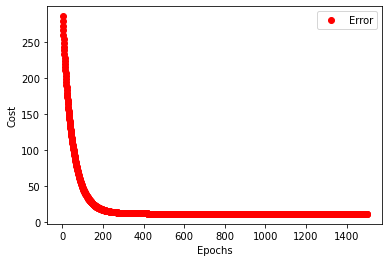

In [225]:
# plotting error vs iterations

iters = []
i = 1
while i <= 1500:
    iters.append(i)
    i = i + 1
    
pyplot.plot(iters, J, 'ro')
pyplot.ylabel('Cost')
pyplot.xlabel('Epochs')
pyplot.legend(['Error'])

## Evaluating on test data now

In [226]:
test_X = separateFeatures(test_X, 13, 102) # now the features have been separated

# Converting to numpy arrays
for i in range(len(test_X)):
    test_X[i] = np.array(test_X[i]) 

In [227]:
# Normalizing

i = 0
for f in test_X:
    test_X[i] = (f - means[i]) / (stds[i])
    i = i + 1

In [228]:
test_X = combineFeatures(test_X, 102) # now the features have been combined back as before

In [229]:
# Now predicting on test set

h_x = predict2(theta, test_X)
print(h_x)

[[ 9.72338748 21.39796487 20.69820786 34.29594858 25.7979315  20.9828244
  28.58802948 24.93707942 19.15377815 22.6156488  20.61960032 18.1818474
  16.84314373 35.22255556 19.08278208 19.40096538 24.68158545 22.07218211
  19.78094024 24.0562454  11.91080111 16.87330938 22.3195094  12.82160609
  21.4212583  23.66520163 33.35065101 23.63014669 13.28314697 21.08102304
  23.90718007 18.9517159  35.95587464 23.54886398 18.84832608  5.87256797
  14.42486634 22.89185618 17.6992043  26.98512905 22.20972471 28.82195117
  17.72635946 34.77996448 30.80517567 24.36055104 30.36158662 18.09623718
  22.62952384 24.04874918 30.14013386 18.38512146 10.29316117 13.84266195
  34.79572404 27.49570505 18.04828023 39.98959208 37.39983949 24.53286784
  25.68495472 20.57131154 20.15700266 21.72550398 24.60000133 23.74170053
  17.40983823 26.358009    5.40834262 12.02599591 24.52908483 23.99494457
  23.26758656 10.01933345 28.33748587 20.85276047 20.76985026 24.68420418
  33.29282942  6.82223796 24.16358445 36

In [230]:
# Cost on test set

J = computeCost2(test_X, test_Y, theta)
print("Cost on test set: ", J)

Cost on test set:  11.473302931574148


## 3. Regularized Linear Regression

Now, you'll use the [scikit-learn](https://scikit-learn.org/stable/index.html) to implement [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) and apply them to Boston house pricing dataset (provided in part 2). Try out different values of regularization coefficient (known as alpha in scikit-learn) and use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to report loss with each regression. Finally, plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$ (y-axis) for Ridge and Lasso. Please read [this blog](https://scienceloft.com/technical/understanding-lasso-and-ridge-regression/) to get better understanding of the desired plots.

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [12]:
train_X = np.loadtxt(os.path.join('Data', 'ex2traindata.txt'))
train_Y = np.loadtxt(os.path.join('Data', 'ex2trainlabels.txt'))
test_X = np.loadtxt(os.path.join('Data', 'ex2testdata.txt'))
test_Y = np.loadtxt(os.path.join('Data', 'ex2testlabels.txt'))

In [13]:
train_X = separateFeatures(train_X, 13, 404) # now the features have been separated

# Converting to numpy arrays
for i in range(len(train_X)):
    train_X[i] = np.array(train_X[i])

In [14]:
# Normalizing

i = 0
for f in train_X:
    train_X[i] = (f - means[i]) / (stds[i])
    i = i + 1

In [15]:
train_X = combineFeatures(train_X, 404) # now the features have been combined back as before

In [16]:
test_X = separateFeatures(test_X, 13, 102) # now the features have been separated

# Converting to numpy arrays
for i in range(len(test_X)):
    test_X[i] = np.array(test_X[i]) 

In [17]:
# Normalizing

i = 0
for f in test_X:
    test_X[i] = (f - means[i]) / (stds[i])
    i = i + 1

In [18]:
test_X = combineFeatures(test_X, 102) # now the features have been combined back as before

## Linear Regression

In [238]:
def skLinear():
    reg = LinearRegression().fit(train_X, train_Y)
    print("Score: ", reg.score(train_X, train_Y))
    print("Coefficients")
    print(reg.coef_)
    print("Intercept: ", reg.intercept_)
    pred = reg.predict(test_X)
    print("Loss: ", mean_squared_error(test_Y, pred))

In [239]:
skLinear()

Score:  0.7399643695249462
Coefficients
[ 0.         -1.10749194  1.35308963  0.02710126  0.9943535  -2.40156557
  2.3962877   0.2111952  -3.47121628  2.90814885 -1.95741889 -1.98298545
  0.81955092 -4.02739073]
Intercept:  22.395049504950496
Loss:  23.195599256422938


## These values of alphas are global

In [22]:
alphas = np.logspace(-6, 6, 200)

## Ridge

In [19]:
ridge_theeta = []

In [23]:
def skRidge():
    for a in alphas:
        print("Alpha = ", a)
        clf = Ridge(alpha=a)
        clf.fit(train_X, train_Y)
        print("Score: ", clf.score(train_X, train_Y))
        print("Coefficients")
        print(clf.coef_)
        ridge_theeta.append(clf.coef_)
        print("Intercept: ", clf.intercept_)
        pred = clf.predict(test_X)
        print("Loss: ", mean_squared_error(test_Y, pred))
        print("")

In [24]:
skRidge()

Alpha =  1e-06
Score:  0.7399643695249462
Coefficients
[ 0.         -1.10749192  1.35308961  0.02710123  0.9943535  -2.40156553
  2.39628771  0.21119519 -3.47121624  2.90814874 -1.9574188  -1.98298544
  0.81955092 -4.02739071]
Intercept:  22.395049504950496
Loss:  23.195599162769312

Alpha =  1.1489510001873085e-06
Score:  0.7399643695249462
Coefficients
[ 0.         -1.10749192  1.35308961  0.02710123  0.9943535  -2.40156553
  2.39628771  0.21119519 -3.47121624  2.90814873 -1.95741878 -1.98298544
  0.81955092 -4.02739071]
Intercept:  22.395049504950496
Loss:  23.19559914881951

Alpha =  1.3200884008314168e-06
Score:  0.7399643695249462
Coefficients
[ 0.         -1.10749192  1.3530896   0.02710123  0.9943535  -2.40156552
  2.39628772  0.21119519 -3.47121623  2.90814871 -1.95741877 -1.98298544
  0.81955092 -4.0273907 ]
Intercept:  22.395049504950496
Loss:  23.19559913279188

Alpha =  1.5167168884709241e-06
Score:  0.7399643695249462
Coefficients
[ 0.         -1.10749192  1.3530896   0.0

Alpha =  9.771241535346502e-05
Score:  0.7399643695247207
Coefficients
[ 0.         -1.1074908   1.35308755  0.02709873  0.99435377 -2.40156181
  2.3962891   0.21119408 -3.47121264  2.90813892 -1.95740977 -1.98298436
  0.81955099 -4.02738884]
Intercept:  22.395049504950496
Loss:  23.19559010533567

Alpha =  0.00011226677735108136
Score:  0.7399643695246486
Coefficients
[ 0.         -1.10749063  1.35308724  0.02709836  0.99435381 -2.40156125
  2.39628931  0.21119391 -3.4712121   2.90813744 -1.95740841 -1.98298419
  0.819551   -4.02738856]
Intercept:  22.395049504950496
Loss:  23.19558874227813

Alpha =  0.0001289890261253308
Score:  0.7399643695245534
Coefficients
[ 0.         -1.10749044  1.35308689  0.02709793  0.99435386 -2.4015606
  2.39628955  0.21119372 -3.47121148  2.90813575 -1.95740685 -1.982984
  0.81955101 -4.02738823]
Intercept:  22.395049504950496
Loss:  23.195587176193733

Alpha =  0.00014820207057988585
Score:  0.7399643695244276
Coefficients
[ 0.         -1.10749022  1.3

Score:  0.7399643645781616
Coefficients
[ 0.         -1.10732391  1.35278161  0.02672716  0.99439392 -2.40100745
  2.39649545  0.21102847 -3.47067693  2.90667905 -1.95606824 -1.98282258
  0.81956122 -4.02711065]
Intercept:  22.395049504950496
Loss:  23.194243817641997

Alpha =  0.016638168860761273
Score:  0.7399643629955903
Coefficients
[ 0.         -1.1072989   1.35273575  0.02667148  0.99439993 -2.40092434
  2.39652638  0.21100365 -3.4705966   2.90646027 -1.95586721 -1.98279832
  0.81956276 -4.02706894]
Intercept:  22.395049504950496
Loss:  23.194042056469993

Alpha =  0.019116440753856996
Score:  0.7399643609068882
Coefficients
[ 0.         -1.10727016  1.35268307  0.02660752  0.99440684 -2.40082886
  2.39656191  0.21097514 -3.47050431  2.90620894 -1.95563629 -1.98277046
  0.81956452 -4.02702102]
Intercept:  22.395049504950496
Loss:  23.193810285235298

Alpha =  0.02196385372416547
Score:  0.7399643581502721
Coefficients
[ 0.         -1.10723715  1.35262255  0.02653405  0.99441478 

Score:  0.7399388739584051
Coefficients
[ 0.00000000e+00 -1.09538705e+00  1.33095822e+00  6.64875131e-04
  9.97134035e-01 -2.36096602e+00  2.41117619e+00  1.99299395e-01
 -3.43164125e+00  2.80368045e+00 -1.86199819e+00 -1.97118899e+00
  8.20307899e-01 -4.00695831e+00]
Intercept:  22.395049504950496
Loss:  23.09926394180042

Alpha =  1.231550603292826
Score:  0.7399310129116737
Coefficients
[ 0.00000000e+00 -1.09363937e+00  1.32777293e+00 -3.06607808e-03
  9.97513342e-01 -2.35503982e+00  2.41331192e+00  1.97601302e-01
 -3.42580750e+00  2.78883418e+00 -1.84853585e+00 -1.96947541e+00
  8.20419369e-01 -4.00396499e+00]
Intercept:  22.395049504950496
Loss:  23.085570016395124

Alpha =  1.414991297434576
Score:  0.739920782357282
Coefficients
[ 0.         -1.0916483   1.32414712 -0.00729037  0.99793864 -2.34826879
  2.41574061  0.19567267 -3.41912454  2.77199259 -1.83329477 -1.96751997
  0.82054693 -4.00054123]
Intercept:  22.395049504950496
Loss:  23.0700331640045

Alpha =  1.625755666443793

[ 0.         -0.74485069  0.74809919 -0.41164654  0.93536647 -1.02368688
  2.60402898 -0.06242867 -1.73929314  0.71876685 -0.4385814  -1.55088182
  0.78963571 -3.04382604]
Intercept:  22.395049504950496
Loss:  21.880161036114643

Alpha =  104.73708979594487
Score:  0.707829610277465
Coefficients
[ 0.         -0.72485644  0.71996573 -0.42173739  0.91932415 -0.95348679
  2.58039981 -0.07465806 -1.6181434   0.63477269 -0.41617707 -1.51818905
  0.77860811 -2.95367043]
Intercept:  22.395049504950496
Loss:  22.04114231155451

Alpha =  120.33778407775905
Score:  0.7027995640164371
Coefficients
[ 0.         -0.70511387  0.69313282 -0.43097825  0.90118067 -0.88716838
  2.54930415 -0.08684658 -1.49718452  0.55395232 -0.39865881 -1.48399871
  0.76581482 -2.85900468]
Intercept:  22.395049504950496
Loss:  22.263330143472327

Alpha =  138.26221737646534
Score:  0.6971031642324599
Coefficients
[ 0.         -0.68568213  0.66772019 -0.43941738  0.88085228 -0.82528325
  2.5102695  -0.09904181 -1.3772665

Score:  0.12662052252342848
Coefficients
[ 0.         -0.08833496  0.08829235 -0.10925504  0.04474971 -0.09961952
  0.17104899 -0.08113342  0.05073392 -0.08317719 -0.102159   -0.1207403
  0.08104955 -0.17926248]
Intercept:  22.395049504950496
Loss:  72.90154373931482

Alpha =  15522.25357427048
Score:  0.11309331208745033
Coefficients
[ 0.         -0.07841872  0.07843185 -0.09721459  0.03913158 -0.08872852
  0.15051564 -0.07245302  0.04599297 -0.07434302 -0.09097904 -0.10658504
  0.07186232 -0.1581648 ]
Intercept:  22.395049504950496
Loss:  74.0655983500871

Alpha =  17834.308769319057
Score:  0.10072951791119844
Coefficients
[ 0.         -0.06946116  0.06951255 -0.08628433  0.03419797 -0.07882181
  0.13228552 -0.06450987  0.04148055 -0.06624104 -0.08081044 -0.09394113
  0.06358507 -0.13934116]
Intercept:  22.395049504950496
Loss:  75.12738488365382

Alpha =  20490.74689815846
Score:  0.08948900144507554
Coefficients
[ 0.         -0.06140343  0.06147979 -0.07641015  0.02987054 -0.06985

## Lasso

In [244]:
lasso_theeta = []

In [245]:
def skLasso():
    for a in alphas:
        print("Alpha = ", a)
        clf = Lasso(alpha=a)
        clf.fit(train_X, train_Y)
        print("Score: ", clf.score(train_X, train_Y))
        print("Coefficients")
        print(clf.coef_)
        lasso_theeta.append(clf.coef_)
        print("Intercept: ", clf.intercept_)
        pred = clf.predict(test_X)
        print("Loss: ", mean_squared_error(test_Y, pred))
        print('')

In [246]:
skLasso()

Alpha =  1e-06
Score:  0.7399643695240674
Coefficients
[ 0.         -1.10748929  1.353085    0.02709255  0.99435368 -2.40155767
  2.39628951  0.21119037 -3.47121331  2.90812923 -1.95739997 -1.98298293
  0.8195501  -4.02738849]
Intercept:  22.395049504950496
Loss:  23.195584155229824

Alpha =  1.1489510001873085e-06
Score:  0.7399643695237863
Coefficients
[ 0.         -1.10748889  1.35308431  0.02709125  0.99435371 -2.4015565
  2.39628978  0.21118965 -3.47121287  2.90812631 -1.95739715 -1.98298255
  0.81954997 -4.02738816]
Intercept:  22.395049504950496
Loss:  23.195581906816923

Alpha =  1.3200884008314168e-06
Score:  0.739964369523415
Coefficients
[ 0.         -1.10748844  1.35308352  0.02708976  0.99435374 -2.40155515
  2.39629009  0.21118882 -3.47121236  2.90812295 -1.95739391 -1.98298212
  0.81954983 -4.02738778]
Intercept:  22.395049504950496
Loss:  23.195579323481283

Alpha =  1.5167168884709241e-06
Score:  0.739964369522925
Coefficients
[ 0.         -1.10748792  1.35308261  0.02

Score:  0.7399643667605191
Coefficients
[ 0.         -1.10734342  1.35283001  0.02661267  0.99436372 -2.40112277
  2.39638947  0.21092404 -3.47104974  2.90704848 -1.95635736 -1.98284371
  0.81950467 -4.02726537]
Intercept:  22.395049504950496
Loss:  23.194752735776987

Alpha =  6.44236350872137e-05
Score:  0.7399643658760164
Coefficients
[ 0.         -1.10732131  1.35279139  0.02653986  0.99436524 -2.4010568
  2.39640459  0.2108837  -3.47102496  2.90688468 -1.95619933 -1.98282259
  0.81949777 -4.02724673]
Intercept:  22.395049504950496
Loss:  23.19462682859748

Alpha =  7.401959996915637e-05
Score:  0.739964364708458
Coefficients
[ 0.         -1.10729591  1.35274701  0.02645621  0.99436698 -2.40098099
  2.39642196  0.21083736 -3.47099648  2.90669647 -1.95601777 -1.98279831
  0.81948985 -4.02722533]
Intercept:  22.395049504950496
Loss:  23.194482183513774

Alpha =  8.504489341802669e-05
Score:  0.7399643631672337
Coefficients
[ 0.         -1.10726672  1.35269603  0.0263601   0.99436898 

Score:  0.739951009656372
Coefficients
[ 0.         -1.09629557  1.33451193  0.          0.99471193 -2.37142439
  2.40436266  0.19124954 -3.45664651  2.83001558 -1.88425818 -1.97339776
  0.81631736 -4.01877758]
Intercept:  22.395049504950496
Loss:  23.131742518901973

Alpha =  0.004768611697714469
Score:  0.7399474437259734
Coefficients
[ 0.         -1.09452592  1.33200183  0.          0.99459185 -2.3681106
  2.4058277   0.18831155 -3.453465    2.81977112 -1.87569464 -1.97237335
  0.81592043 -4.01777361]
Intercept:  22.395049504950496
Loss:  23.12123224567295

Alpha =  0.005478901179593939
Score:  0.7399427786750046
Coefficients
[ 0.         -1.09251996  1.32911603  0.          0.99445018 -2.36433378
  2.40750343  0.18493848 -3.44981393  2.80815773 -1.86596571 -1.97121532
  0.81547015 -4.01660818]
Intercept:  22.395049504950496
Loss:  23.1092702676326

Alpha =  0.006294988990221888
Score:  0.7399365723447375
Coefficients
[ 0.         -1.09018592  1.32580173 -0.          0.99429117 -2.3

Score:  0.7089654405255221
Coefficients
[ 0.         -0.34880533  0.44189421 -0.          0.82227847 -0.85748981
  2.75752731 -0.         -1.52980888  0.         -0.         -1.54088465
  0.58170836 -3.87159824]
Intercept:  22.395049504950496
Loss:  21.39112248295632

Alpha =  0.352970730273065
Score:  0.703419755518029
Coefficients
[ 0.         -0.30255423  0.31448883 -0.          0.78499437 -0.67488282
  2.77448453 -0.         -1.23467259  0.         -0.         -1.52754013
  0.57085789 -3.85647714]
Intercept:  22.395049504950496
Loss:  21.355957750154367

Alpha =  0.4055460735840828
Score:  0.6961014359416031
Coefficients
[ 0.         -0.24949241  0.16830063 -0.          0.74215562 -0.4650534
  2.79387584 -0.         -0.89573395  0.         -0.         -1.51213452
  0.55834915 -3.83918164]
Intercept:  22.395049504950496
Loss:  21.40764210318115

Alpha =  0.46595256686646774
Score:  0.6864339374030981
Coefficients
[ 0.00000000e+00 -1.88579304e-01  4.19237281e-04 -0.00000000e+00
  6.9

Score:  0.0
Coefficients
[ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
Intercept:  22.395049504950496
Loss:  83.71085929676252

Alpha =  52.31099308056258
Score:  0.0
Coefficients
[ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
Intercept:  22.395049504950496
Loss:  83.71085929676252

Alpha =  60.102767820703754
Score:  0.0
Coefficients
[ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
Intercept:  22.395049504950496
Loss:  83.71085929676252

Alpha =  69.05513520162316
Score:  0.0
Coefficients
[ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
Intercept:  22.395049504950496
Loss:  83.71085929676252

Alpha =  79.34096665797492
Score:  0.0
Coefficients
[ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
Intercept:  22.395049504950496
Loss:  83.71085929676252

Alpha =  91.15888299750819
Score:  0.0
Coefficients
[ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
Intercept:  22.395049504950496
Loss:  83.71085929676252

Alpha =  104.73708979594

Score:  0.0
Coefficients
[ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
Intercept:  22.395049504950496
Loss:  83.71085929676252

Alpha =  499450.511585514
Score:  0.0
Coefficients
[ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
Intercept:  22.395049504950496
Loss:  83.71085929676252

Alpha =  573844.1648302381
Score:  0.0
Coefficients
[ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
Intercept:  22.395049504950496
Loss:  83.71085929676252

Alpha =  659318.8271333541
Score:  0.0
Coefficients
[ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
Intercept:  22.395049504950496
Loss:  83.71085929676252

Alpha =  757525.025877192
Score:  0.0
Coefficients
[ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
Intercept:  22.395049504950496
Loss:  83.71085929676252

Alpha =  870359.1361485148
Score:  0.0
Coefficients
[ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
Intercept:  22.395049504950496
Loss:  83.71085929676252

Alpha =  1000000.0
Score:  

## Elastic Net

In [247]:
elastic_theeta = []

In [248]:
def skElastic():
    for a in alphas:
        print("Alpha = ", a)
        clf = ElasticNet(alpha=a)
        clf.fit(train_X, train_Y)
        print("Score: ", clf.score(train_X, train_Y))
        print("Coefficients")
        print(clf.coef_)
        elastic_theeta.append(clf.coef_)
        print("Intercept: ", clf.intercept_)
        pred = clf.predict(test_X)
        print("Loss: ", mean_squared_error(test_Y, pred))
        print('')

In [249]:
skElastic()

Alpha =  1e-06
Score:  0.7399643695229122
Coefficients
[ 0.         -1.10748827  1.35308302  0.02709168  0.99435415 -2.40155384
  2.3962915   0.21119046 -3.47120727  2.90811852 -1.95739057 -1.98298192
  0.81955065 -4.0273857 ]
Intercept:  22.395049504950496
Loss:  23.19557278573552

Alpha =  1.1489510001873085e-06
Score:  0.7399643695222613
Coefficients
[ 0.         -1.10748772  1.35308203  0.02709026  0.99435425 -2.40155209
  2.39629207  0.21118975 -3.47120593  2.90811401 -1.95738636 -1.98298139
  0.81955061 -4.02738495]
Intercept:  22.395049504950496
Loss:  23.195568843478593

Alpha =  1.3200884008314168e-06
Score:  0.7399643695214019
Coefficients
[ 0.         -1.10748709  1.3530809   0.02708862  0.99435436 -2.40155008
  2.39629272  0.21118894 -3.47120439  2.90810882 -1.95738151 -1.98298079
  0.81955057 -4.02738409]
Intercept:  22.395049504950496
Loss:  23.195564314136675

Alpha =  1.5167168884709241e-06
Score:  0.7399643695202676
Coefficients
[ 0.         -1.10748637  1.3530796   0.

Score:  0.7399606350356562
Coefficients
[ 0.         -1.10251063  1.34411812  0.0141581   0.99522652 -2.38559407
  2.40144243  0.20476313 -3.45891816  2.8671629  -1.91920628 -1.97818081
  0.81918574 -4.02055458]
Intercept:  22.395049504950496
Loss:  23.1599168510414

Alpha =  0.0015702901247293774
Score:  0.7399594528927986
Coefficients
[ 0.         -1.10177527  1.34279331  0.01225511  0.99535267 -2.38322951
  2.40220202  0.20381367 -3.45709053  2.8611397  -1.91359912 -1.97747074
  0.81913161 -4.01954087]
Intercept:  22.395049504950496
Loss:  23.15468778090933

Alpha =  0.0018041864093920718
Score:  0.7399578949869
Coefficients
[ 0.         -1.10092901  1.34127157  0.01007227  0.99549746 -2.38051469
  2.40307523  0.20272149 -3.45499244  2.85422047 -1.90716226 -1.97665477
  0.81906891 -4.01837555]
Intercept:  22.395049504950496
Loss:  23.148695950908575

Alpha =  0.0020729217795953697
Score:  0.7399558533763241
Coefficients
[ 0.         -1.09996339  1.33953207  0.00757908  0.99566093 -2

  0.23386117 -1.60297893]
Intercept:  22.395049504950496
Loss:  38.733421777686225

Alpha =  2.833096101839324
Score:  0.47573646491591615
Coefficients
[ 0.         -0.20343774  0.12776164 -0.28470889  0.         -0.22156161
  1.37080436 -0.          0.         -0.         -0.24823693 -0.69720199
  0.18744158 -1.47559467]
Intercept:  22.395049504950496
Loss:  41.6767028667478

Alpha =  3.2550885998350565
Score:  0.44181921783156686
Coefficients
[ 0.         -0.16528234  0.10173808 -0.27172531  0.         -0.2019719
  1.23740217 -0.          0.         -0.         -0.23219145 -0.6146566
  0.13861768 -1.34738267]
Intercept:  22.395049504950496
Loss:  44.79683877896542

Alpha =  3.739937302478794
Score:  0.40331675926185295
Coefficients
[ 0.         -0.12407313  0.07126442 -0.25149661  0.         -0.17736146
  1.10392739 -0.          0.         -0.         -0.20967068 -0.53077533
  0.08855856 -1.21894135]
Intercept:  22.395049504950496
Loss:  48.26785711779581

Alpha =  4.297004704320835


Loss:  83.71085929676252

Alpha =  7752.597488629464
Score:  0.0
Coefficients
[ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
Intercept:  22.395049504950496
Loss:  83.71085929676252

Alpha =  8907.35463861042
Score:  0.0
Coefficients
[ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
Intercept:  22.395049504950496
Loss:  83.71085929676252

Alpha =  10234.114021054527
Score:  0.0
Coefficients
[ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
Intercept:  22.395049504950496
Loss:  83.71085929676252

Alpha =  11758.495540521533
Score:  0.0
Coefficients
[ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
Intercept:  22.395049504950496
Loss:  83.71085929676252

Alpha =  13509.935211980252
Score:  0.0
Coefficients
[ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
Intercept:  22.395049504950496
Loss:  83.71085929676252

Alpha =  15522.25357427048
Score:  0.0
Coefficients
[ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
Intercept:  22.395049504950

## Now Plotting

In [250]:
features = ["Col1","Col2","Col3","Col4","Col5","Col6","Col7","Col8","Col9","Col10","Col11","Col12","Col13"]

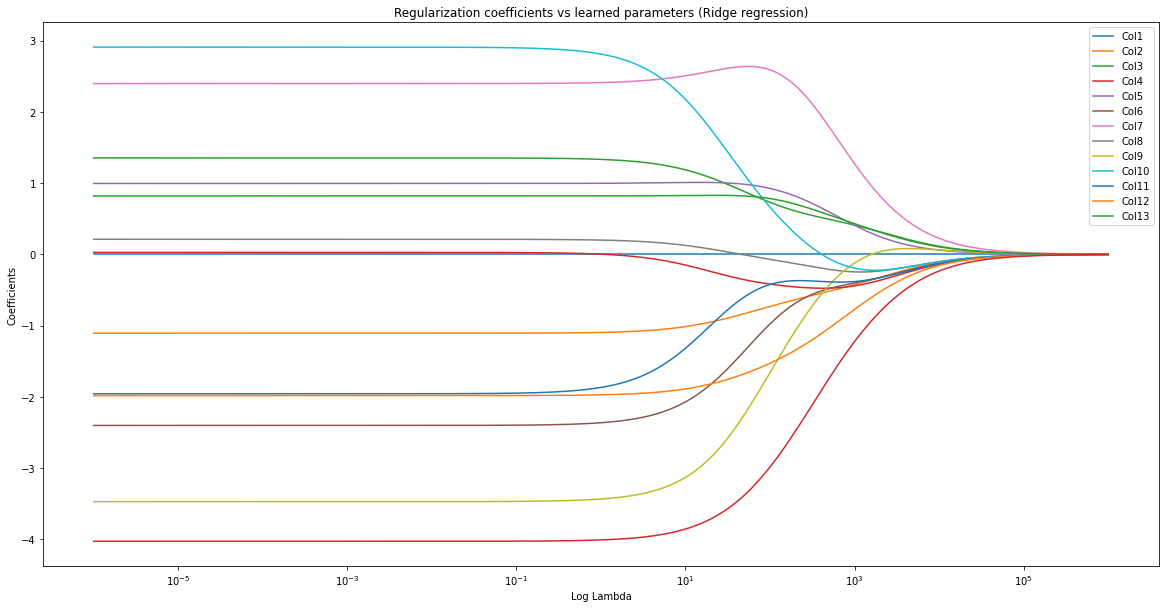

In [251]:
plt.figure(figsize=(20, 10))
plt.plot(alphas, ridge_theeta)
plt.xscale('log')
plt.xlabel('Log Lambda')
plt.ylabel('Coefficients')
plt.axis('tight')
plt.title("Regularization coefficients vs learned parameters (Ridge regression)")
plt.legend(features) # columns according to the input file
plt.show()

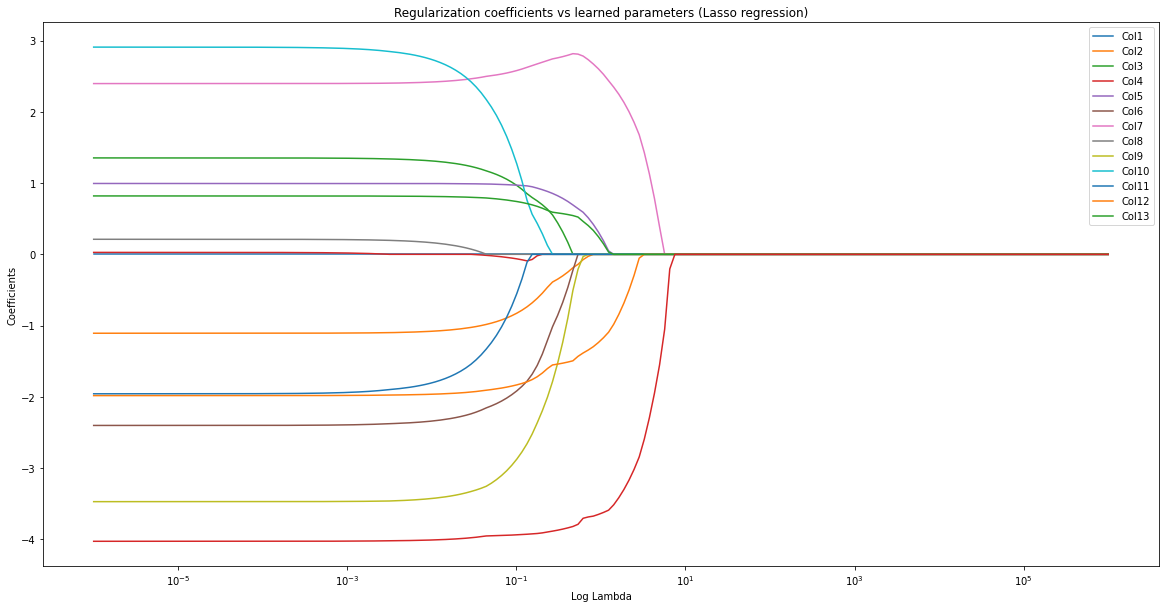

In [252]:
plt.figure(figsize=(20, 10))
plt.plot(alphas, lasso_theeta)
plt.xscale('log')
plt.xlabel('Log Lambda')
plt.ylabel('Coefficients')
plt.axis('tight')
plt.title("Regularization coefficients vs learned parameters (Lasso regression)")
plt.legend(features) # columns according to the input file
plt.show()